<a href="https://colab.research.google.com/github/mvs110/GIS-FALL/blob/main/Copy_of_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

# PS 1

TITLE : Empirical analysis of Health and Economic disparities across New Jersey Counties

Health outcomes across communities are influenced by a complex interplay of socioeconomic factors, with poverty often cited as a critical determinant. In New Jersey, like much of the United States, geographic and economic disparities manifest in various aspects of public health, including the prevalence of physically and mentally unhealthy days reported by residents. This study aims to investigate these health disparities by mapping and analyzing the distribution of unhealthy days across New Jersey counties, integrating socioeconomic data to deepen our understanding of these patterns.

To execute this:

New jersey county level shapefile, quality of life data for new jersey counties, and New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022 were used.

Hypothesis: Counties in New Jersey with higher poverty rates will report more physically and mentally unhealthy days per month, reflecting the adverse impacts of socioeconomic status on health during the COVID-19 pandemic.

Research Question: What spatial patterns exist in the distribution of physically and mentally unhealthy days across New Jersey counties, and how are these patterns associated with county-level poverty rates in 2020?

Data on:

New Jersey Quality of Life - Physically Unhealthy Days Per Month / Mentally Unhealthy Days Per Month .

New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022.



Data source:

--Social Explorer: Health Data 2020 Release, Census



In [20]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

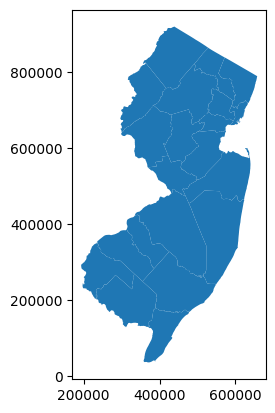

In [21]:
#make the map
njC0.plot()

In [22]:
njC0.head()

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705..."


In [23]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [24]:
NJ_pov.dtypes

,0
GEOID_DESCRIPTION,object
COUNTY,object
GEOID_NAME,object
SITSINSTATE,object
GEOID,int32
GEOID_FORMATTED,int32
PPOV,float32
TIMEFRAME,object
GEOVINTAGE,int16
SOURCE,object


In [25]:
qua_lf.dtypes


,0
COUNTY,object
PhysicallyUnhealthyDaysperMo,float64
MentallyUnhealthyDaysperMont,float64


In [26]:
NJ_pov.head(2)

,GEOID_DESCRIPTION,COUNTY,GEOID_NAME,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION
0,County,ATLANTIC,Atlantic,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State)
1,County,BERGEN,Bergen,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State)


In [27]:
qua_lf.head(2)

,COUNTY,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont
0,ATLANTIC,4.41,4.42
1,BERGEN,3.14,3.42


In [28]:
nj_qualf = pd.merge(njC0, qua_lf, on='COUNTY',how='outer',indicator=True)

In [29]:
nj_pov = pd.merge(njC0, NJ_pov, on='COUNTY', how='outer', indicator='merge_status')


In [30]:
nj_qualf.head(24)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,PhysicallyUnhealthyDaysperMo,MentallyUnhealthyDaysperMont,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",4.41,4.42,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",3.14,3.42,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.69 491361.78, 436701.19 49135...",3.39,4.15,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.99 423475.83, 342804.1 423429...",3.94,4.18,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.73 177065.13, 390410.17 17705...",3.89,4.20,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26...",4.27,4.62,both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.94 755990.81, 541175.5 755969...",3.89,3.78,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.25 382993.34, 315650.44 38290...",3.50,3.99,both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.72, 586222.3...",4.00,3.92,both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70...",2.79,3.54,both


In [31]:
nj_pov.head(24)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,GEOID_NAME,SITSINSTATE,GEOID,GEOID_FORMATTED,PPOV,TIMEFRAME,GEOVINTAGE,SOURCE,LOCATION,merge_status
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,Atlantic,NJ,34001,34001,13.03,2018-2022,2022,Census,New Jersey (State),both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,Bergen,NJ,34003,34003,6.77,2018-2022,2022,Census,New Jersey (State),both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,Burlington,NJ,34005,34005,6.58,2018-2022,2022,Census,New Jersey (State),both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,Camden,NJ,34007,34007,12.41,2018-2022,2022,Census,New Jersey (State),both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,Cape May,NJ,34009,34009,8.96,2018-2022,2022,Census,New Jersey (State),both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,Cumberland,NJ,34011,34011,15.52,2018-2022,2022,Census,New Jersey (State),both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,Essex,NJ,34013,34013,15.03,2018-2022,2022,Census,New Jersey (State),both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,Gloucester,NJ,34015,34015,7.47,2018-2022,2022,Census,New Jersey (State),both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,Hudson,NJ,34017,34017,14.16,2018-2022,2022,Census,New Jersey (State),both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,Hunterdon,NJ,34019,34019,3.69,2018-2022,2022,Census,New Jersey (State),both


In [32]:
nj_qualf1 = pd.merge(njC0, qua_lf, on='COUNTY',how='inner',indicator=False)

In [33]:
nj_pov1 = pd.merge(njC0, NJ_pov, on='COUNTY',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 95.84471590140998, 'source/definition: Social Explorer - Health Data 2020 Release')

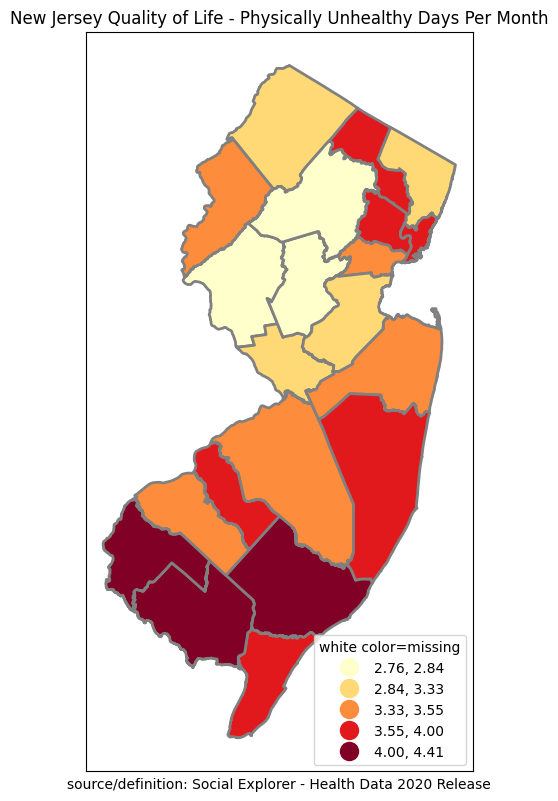

In [34]:
fig, ax = plt.subplots(1, figsize=(5,10))
nj_qualf1.plot(ax=ax,column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

New Jersey Counties showing Physically unhealthy days per month.

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

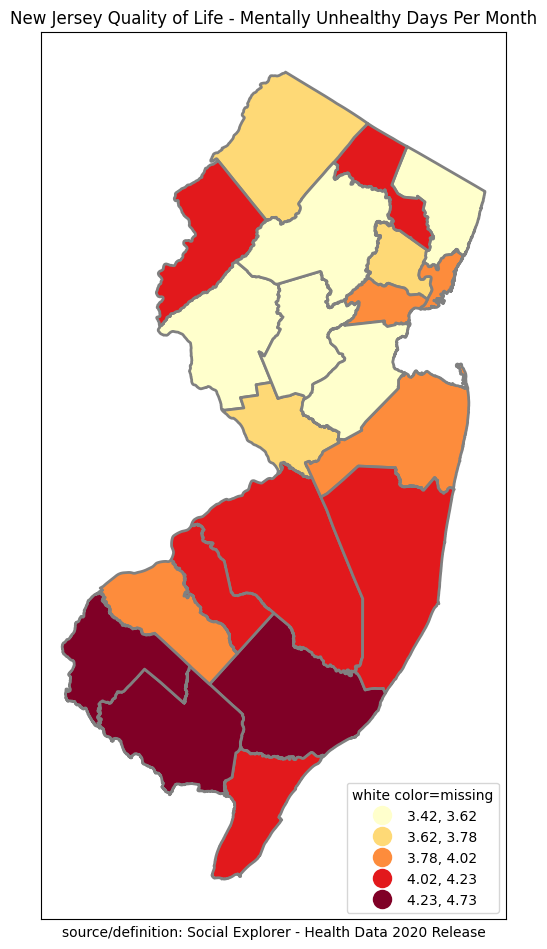

In [35]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Output: New Jersey counties showing mentally unstable days per month.

Findings:

The mapped data revealed a notably higher concentration of both physically and mentally unhealthy days in South Jersey compared to other regions of the state. This phenomenon prompts a closer examination of the underlying factors that might contribute to these health disparities.

To ascertain more trends : E.g Poverty (New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022)

To get a more defined map, county names were included.

In [36]:
print(nj_pov.columns)


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'GEOID_DESCRIPTION',
       'GEOID_NAME', 'SITSINSTATE', 'GEOID', 'GEOID_FORMATTED', 'PPOV',
       'TIMEFRAME', 'GEOVINTAGE', 'SOURCE', 'LOCATION', 'merge_status'],
      dtype='object')


In [37]:
nj_pov = nj_pov.set_geometry('geometry')



<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Census')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

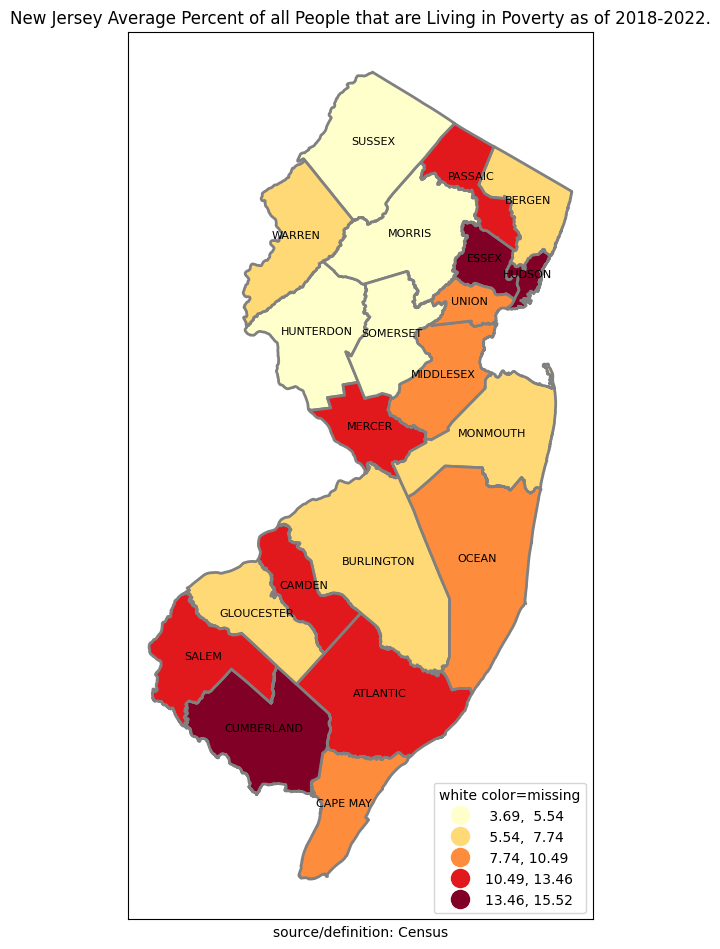

In [38]:
fig, ax = plt.subplots(1, figsize=(6, 12))
nj_pov.plot(ax=ax, column='PPOV', legend=True, cmap='YlOrRd',
            scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
            legend_kwds={"fmt": "{:,.2f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('white color=missing')
ax.title.set_text("New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022.")
ax.set_xticks([])  # removes x ticks
ax.set_yticks([])  # removes y ticks
ax.set_xlabel('source/definition: Census')

for _, row in nj_pov.iterrows():
    # Calculate the centroid of the geometry for placing labels
    centroid = row['geometry'].centroid
    # Annotate the county name at the centroid
    ax.annotate(row['COUNTY'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8)


Output: Counties names to better understand trends.

Findings

Socioeconomic Factors:

South Jersey has historically faced various economic challenges compared to its northern counterpart. Factors such as higher rates of unemployment, lower income levels, and limited access to healthcare services can contribute to worse health outcomes. These socioeconomic disparities could explain the higher number of unhealthy


Demographic Considerations:

Differences in population density, age distribution, and racial and ethnic makeup can also influence health metrics. For instance, areas with older populations or higher proportions of minority groups who have faced systemic healthcare barriers might report more unhealthy days.

To corroborate with this findings, Thompson et al. (2021) in their research in the Journal of Public Health observed similar patterns where regions with lower socioeconomic indices suffered disproportionately during health crises, validating the socioeconomic interpretations made here.


PS2



In [5]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [6]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

 Load the CSV file

In [7]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [8]:
np_location.head(15)

,EIN,Organization Name,Address,City,State,Zip,Total Revenue - Current Year,Total Functional Expenses,Total Liabilities: End of Year,Total Assets: End of Year,Number of Employees Reported on Form W-3,Net Assets,National Taxonomy of Exempt Entities Short Description,Type of 990 Form Filed,Fiscal Year End,National Taxonomy of Exempt Entities Full Description,Point Source,Selected Location
0,ein,organization_name,address,city,state_code,zip_code,tot_rev,tot_exp,tot_liab,tot_assets,tot_emp,net_assets,ntee_short_description,formtype,fisyr,ntee_description,Source,Location
1,01-0554061,Mount Ephraim Senior Housing Initiative Inc,587 Haddon Ave,COLLINGSWOOD,NJ,8108,635333,786832,7006834,4208983,6,-2797851,"Housing, Shelter",f990,2022,Senior Citizens' Housing/Retirement Communities,Candid,"Camden (County, 2022)"
2,01-0801820,Camden County Partnership for Children Inc,221 Laurel Rd Ste 300,VOORHEES,NJ,8043,17210381,13841547,922543,8510476,141,7587933,Human Services - Multipurpose and Other,f990,2022,Family Services,Candid,"Camden (County, 2022)"
3,02-0650756,Urban Promise Ministries Community Development...,2 N FORKLANDING RD,MAPLE SHADE,NJ,8052,706354,617543,8623,262795,0,254172,"Community Improvement, Capacity Building",f990,2022,"Community, Neighborhood Development, Improvement",Candid,"Camden (County, 2022)"
4,02-0660903,Allied Resources for Children Incorporated,879 BEIDEMAN AVE,CAMDEN,NJ,8105,329853,136385,23054,284844,0,261790,Education,f990,2021,Student Services and Organizations,Candid,"Camden (County, 2022)"
5,04-3769403,Stacy Zallie Foundation Inc,1230 Blackwood Clementon Rd,CLEMENTON,NJ,8021,90903,51100,0,161162,0,161162,"Mental Health, Crisis Intervention",f990,2021,Counseling Support Groups,Candid,"Camden (County, 2022)"
6,06-1024058,American Society of Perianesthesia Nurses,90 Frontage Rd,CHERRY HILL,NJ,8034,3496191,2481404,775318,7337515,12,6562197,Health,f990,2021,Nursing Services General (includes Candy Strip...,Candid,"Camden (County, 2022)"
7,11-3786401,Village Wrap Inc,316 Haddon Ave,COLLINGSWOOD,NJ,8108,285182,250496,0,36374,0,36374,Human Services - Multipurpose and Other,f990,2019,Alliance/Advocacy Organizations,Candid,"Camden (County, 2022)"
8,13-2640040,Asgpp Inc,PO Box 1654,MERCHANTVILLE,NJ,8109,106178,87609,0,154196,0,154196,"Mental Health, Crisis Intervention",f990,2022,Professional Societies & Associations,Candid,"Camden (County, 2022)"
9,13-4205636,Family Health Initiatives Inc,2500 McClellan Ave Ste 250,PENNSAUKEN,NJ,8109,3659074,3733670,1113091,1556413,0,443322,Health,f990,2021,Fund Raising and/or Fund Distribution,Candid,"Camden (County, 2022)"


In [9]:
np_location.dtypes

,0
EIN,object
Organization Name,object
Address,object
City,object
State,object
Zip,object
Total Revenue - Current Year,object
Total Functional Expenses,object
Total Liabilities: End of Year,object
Total Assets: End of Year,object


In [10]:
print(np_location.columns)

Index(['EIN', 'Organization Name', 'Address', 'City', 'State', 'Zip',
       'Total Revenue - Current Year', 'Total Functional Expenses',
       'Total Liabilities: End of Year', 'Total Assets: End of Year',
       'Number of Employees Reported on Form W-3', 'Net Assets',
       'National Taxonomy of Exempt Entities Short Description',
       'Type of 990 Form Filed', 'Fiscal Year End',
       'National Taxonomy of Exempt Entities Full Description', 'Point Source',
       'Selected Location'],
      dtype='object')


PS 2

This study further explored one of the key socio-economic factors that was highlighted, which is the unemployment rate in New Jersey. This study examined the relationship between the unemployment rate and quality of life in New Jersey with a closer look at mentally unhealthy days per month and physically unhealthy days per month. It is worth noting that even after the pandemic, many counties in New Jersey are yet to recover from the pandemic era.



#loading the CSV file for unemployment rate trends in New Jersey Counties with emphasis on post pandemic

In [12]:
NJ_umploy = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/policy%20map_unemployment%20change%20rate%20_2020_23.csv', skiprows=1)

In [13]:
print(NJ_umploy.columns)

Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [14]:
NJ_umploy.head()

,COUNTY,cp3_unemprate
0,34001,-11.2
1,34003,-5.3
2,34005,-4.0
3,34007,-4.9
4,34009,-6.1


In [15]:
NJ_umploy

,COUNTY,cp3_unemprate
0,34001,-11.2
1,34003,-5.3
2,34005,-4.0
3,34007,-4.9
4,34009,-6.1
5,34011,-3.9
6,34013,-5.7
7,34015,-4.6
8,34017,-5.8
9,34019,-3.4


In [40]:
print(njC0.columns)
print(NJ_umploy.columns)

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [41]:
print(njC0['FIPSSTCO'].dtype)
print(NJ_umploy['COUNTY'].dtype)

object
int64


In [42]:
njC0['FIPSSTCO'] = njC0['FIPSSTCO'].astype(str)
NJ_umploy['COUNTY'] = NJ_umploy['COUNTY'].astype(str)

MERGING THE NEW VARIABLE : this variable contains information on the unemployment rate in counties in New jersey.

In [43]:
nj_umploy = pd.merge(njC0, NJ_umploy, left_on='FIPSSTCO', right_on='COUNTY', how='outer', indicator='merge_status')

Output for better visualization of this trends

<Axes: >

[]

[]

Text(0.5, 36.72222222222221, 'source/definition: Policy map - BLS')

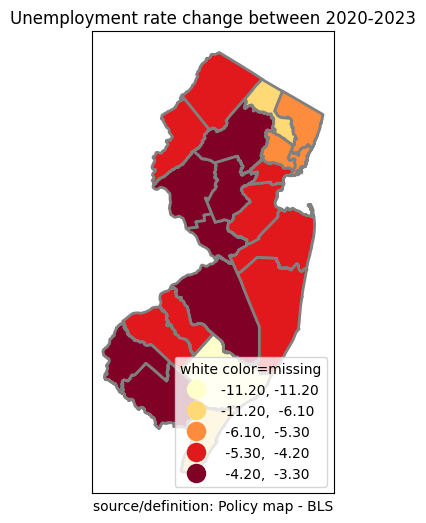

In [44]:
fig, ax = plt.subplots(1, figsize=(4,6))
nj_umploy.plot(ax=ax,column='cp3_unemprate',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Unemployment rate change between 2020-2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Policy map - BLS''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

TRENDS: Counties in dark red have experienced the most minor decrease in unemployment rates (between -4.20% and -3.30%). This suggests that these countries faced more significant economic challenges in reducing unemployment post-pandemic.

Counties with lighter red and orange colors saw more substantial improvements in unemployment (between -11.20% and -4.20%).

looking at the economic structure in New Jersey Northern counties, being more urbanized, likely benefited from industries that transitioned to remote work or reopened more quickly, such as finance, tech, and healthcare.

<Axes: >

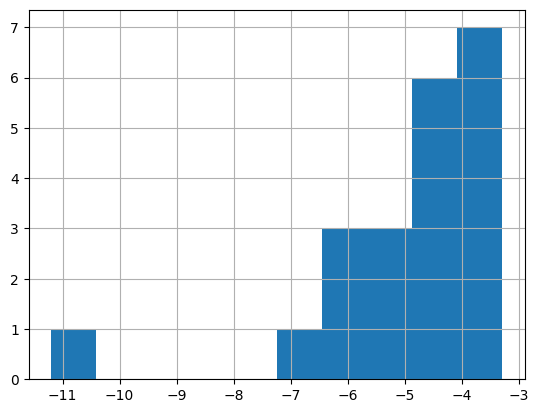

In [45]:
#do think how distribution translate into colors!!
nj_umploy.cp3_unemprate.hist() #negatively  skewed!

<Axes: >

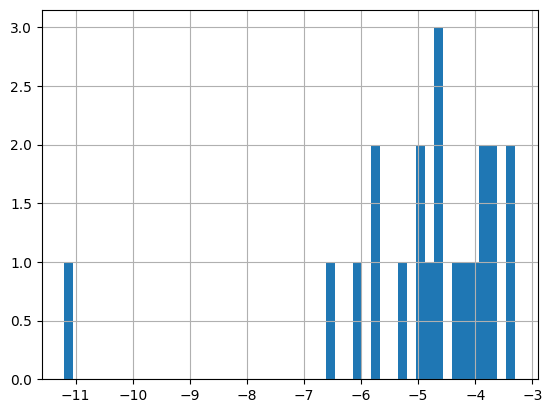

In [46]:
nj_umploy.cp3_unemprate.hist(bins=50) #see better #negatively skewed and presence of outlier !

<Axes: >

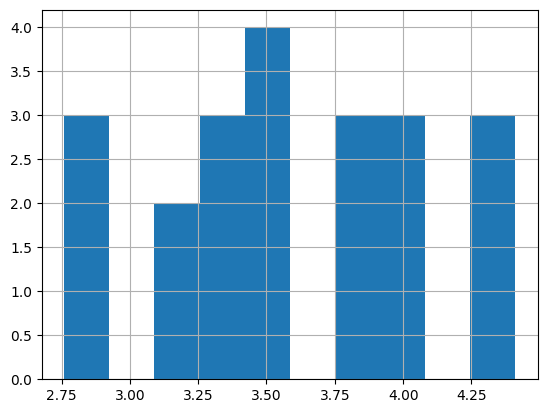

In [47]:
#do think how distribution translate into colors!!
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist() #minimal skewed!

<Axes: >

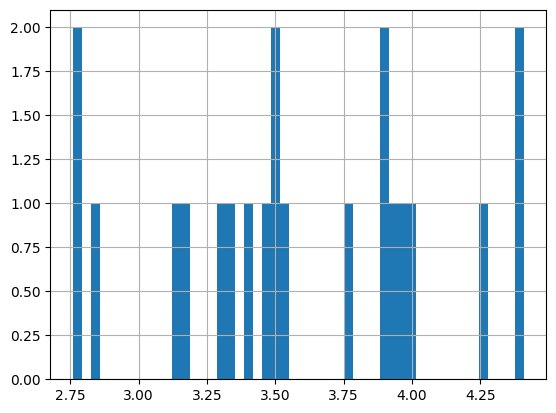

In [48]:
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist(bins=50) #see better ; Minimal or No Skew: The distribution does not show a strong left or right skew.

<Axes: >

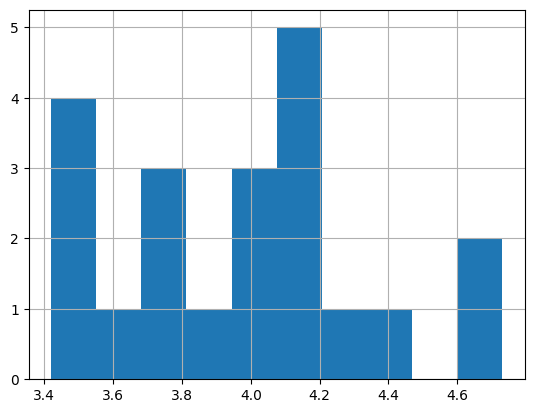

In [49]:
#do think how distribution translate into colors!!
nj_qualf1.MentallyUnhealthyDaysperMont.hist() #skewed to the right!

<Axes: >

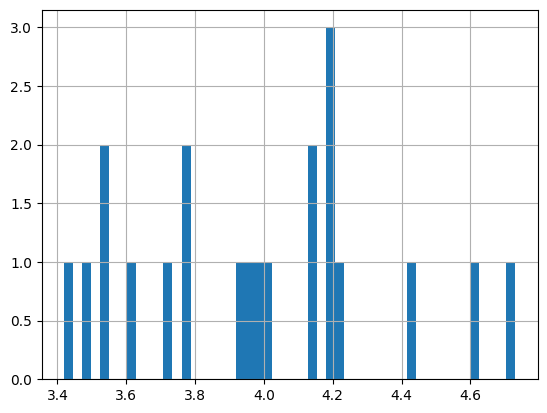

In [50]:
nj_qualf1.MentallyUnhealthyDaysperMont.hist(bins=50) #see better ; skewed to the right

<Axes: >

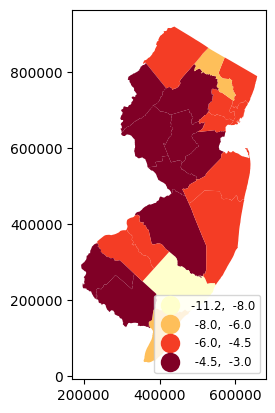

In [51]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
nj_umploy.plot(column="cp3_unemprate", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[-8, -6, -4.5, -3]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.1f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


<Axes: >

[]

[]

<Axes: >

[]

[]

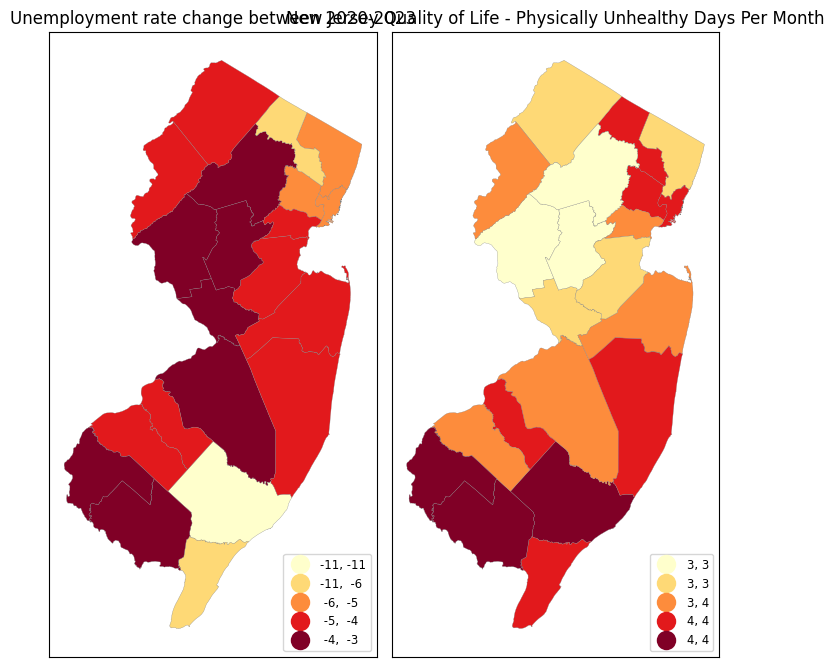

In [67]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

[]

[]

<Axes: >

[]

[]

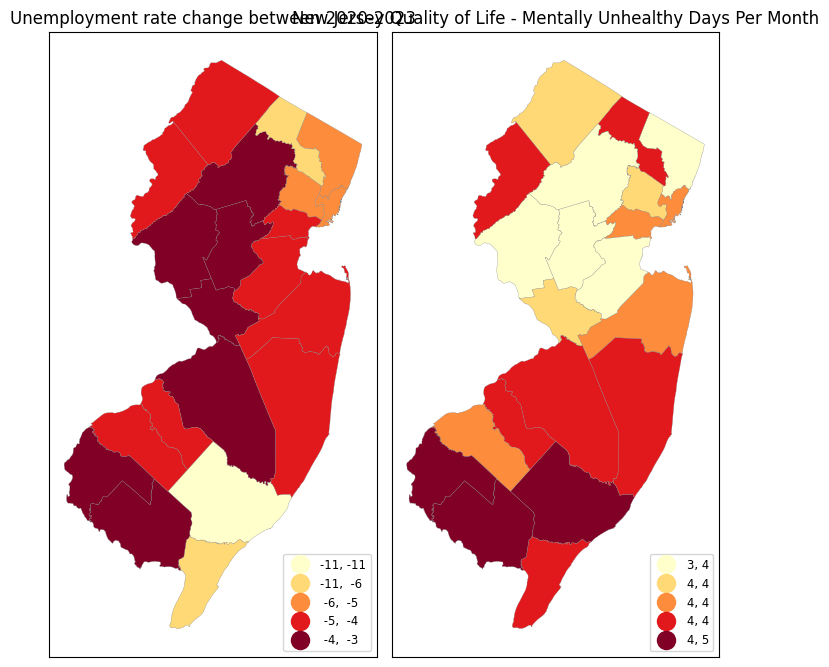

In [68]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [54]:
print(nj_qualf1.columns)  # Check column names in nj_qualf1

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'PhysicallyUnhealthyDaysperMo',
       'MentallyUnhealthyDaysperMont'],
      dtype='object')


In [55]:
print(nj_umploy.columns)  # Check column names in nj_umploy

Index(['COUNTY_x', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO',
       'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990',
       'POP1980', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'REGION', 'Shape_Leng', 'Shape_Area', 'geometry', 'COUNTY_y',
       'cp3_unemprate', 'merge_status'],
      dtype='object')


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

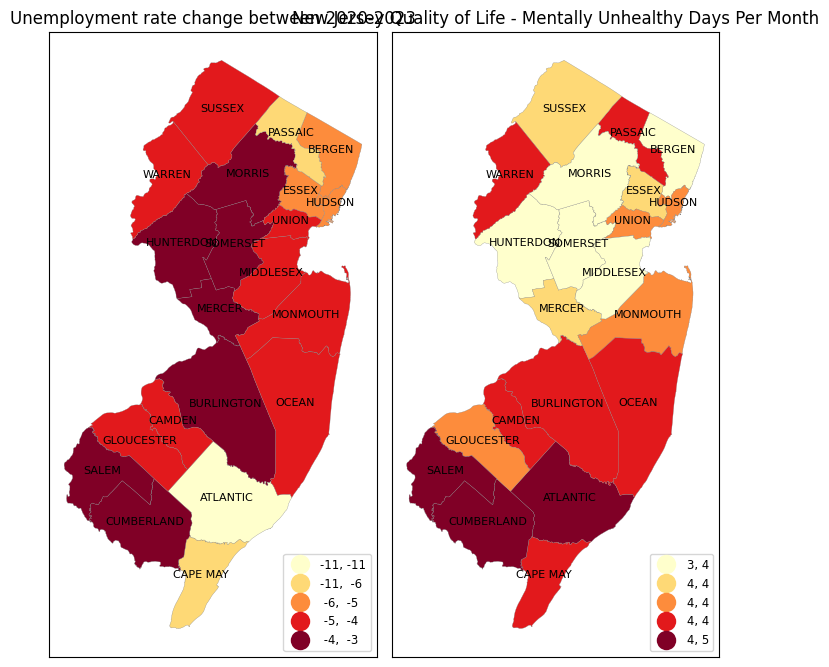

In [69]:


# Create side-by-side subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True, tight_layout=True)

# Plot unemployment rate on the first subplot
nj_umploy.plot(ax=axs[0], column='cp3_unemprate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot quality of life (Physically Unhealthy Days) on the second subplot
nj_qualf1.plot(ax=axs[1], column='MentallyUnhealthyDaysperMont', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)

# Show the plot
#plt.show()


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

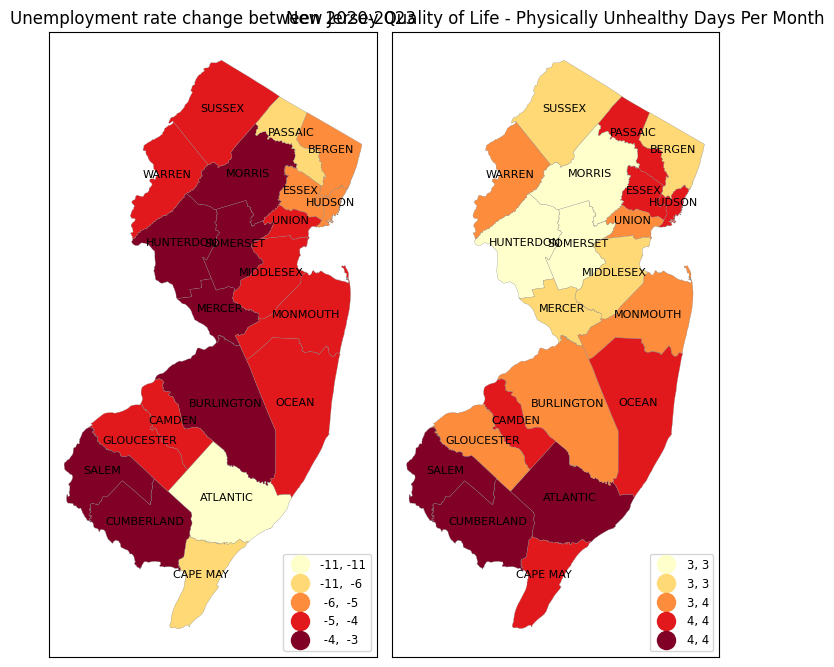

In [70]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])


# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)



Two choropleth maps of New Jersey, each illustrating different data trends across counties:

TRENDS:

Counties such as Cumberland, Salem, Camden, Gloucester, and Atlantic are shaded in dark red, indicating the most considerable unemployment rate decreases (ranging from -11.2% to -6.1%).
These southern counties have experienced substantial reductions in unemployment, suggesting that they have seen economic improvements or recovery after higher unemployment.

It is worth noting that Counties with more significant decreases in unemployment (such as Cumberland, Salem, and Atlantic) may have experienced improvements in economic stability, access to jobs, and overall well-being after the pandemic. This could contribute to a better quality of life, as more employment opportunities often lead to improved health outcomes, mental well-being, and reduced stress.
Interestingly, this is in contrast with the report by NJBIA (2024),  that “despite an acceleration in hiring, New Jersey’s unemployment rate rose 0.1 percentage point to 4.8% in December, finishing out the year 1.5 percentage points higher than the jobless rate was at the end of 2022, state labor officials said Thursday” ((NJBIA, 2024).

 From another standpoint, this might be peculiar to counties, not all counties in New Jersey, after the point to factor in. Buttressing this, the output showed a difference in the unemployment change rate, not just a uniform trend in all counties.

Regional Disparities:

 Northern counties, while not showing the same dramatic drop in unemployment, tend to report fewer mentally unhealthy days. This could be due to better healthcare infrastructure, less economic distress, or other socio-economic factors contributing to overall well-being.

There seems to be a higher incidence of physically unhealthy days in the southern counties, which might correlate with other socio-economic factors, including access to healthcare, lifestyle, and economic conditions.



In [58]:
njP = nj_umploy.copy()

njP["geometry"] = njP["geometry"].centroid

In [59]:
njP.head(3)



,COUNTY_x,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,COUNTY_y,cp3_unemprate,merge_status
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,414,451,335,COASTAL,650228.153906,1.702385e+10,POINT (446845.671 234718.679),34001,-11.2,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,POINT (608674.972 775344.901),34003,-5.3,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,516,482,442,SOUTHERN,788906.717476,2.286903e+10,POINT (445015.1 380378.991),34005,-4.0,both


<Axes: >

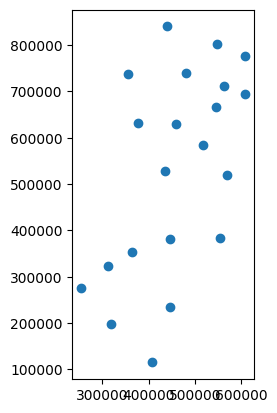

In [60]:
njP.plot()

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

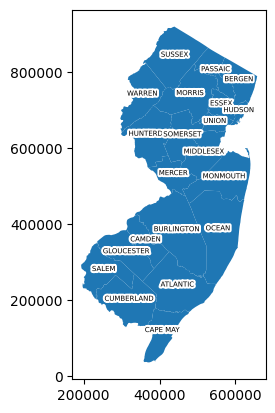

In [61]:
from matplotlib.patheffects import withStroke
ax=nj_umploy.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY_x):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=3, foreground='white')]) #ytext=(3, 3), textcoords="offset points"

Future Research

Future research will examine nonprofits in New Jersey and their contributions to improving the state’s quality of life. Some nonprofit organizations have been part of this recovery process. For instance, Cooper's Ferry Partnership is a community-based organization dedicated to revitalizing Camden. They work on urban redevelopment projects, economic development, and improving the quality of life in Camden's communities.

This study may look into areas of nonprofits and what they intend to offer New Jersey to help curb and improve the quality of life.  Non-profit organizations can be crucial in addressing the socioeconomic challenges highlighted in South Jersey, particularly in improving health outcomes for disadvantaged populations.




LIMITATIONS

Difficulties in understanding the technicalities in sourcing and cleaning useful data.




Reference

NJBIA. (2024, January 18). NJ Unemployment Rate Increases to 4.8%. New Jersey Business & Industry Association. Retrieved from https://njbia.org/nj-unemployment-rate-rises-to-4-8/


In [62]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [63]:
np_location.head(15)

,EIN,Organization Name,Address,City,State,Zip,Total Revenue - Current Year,Total Functional Expenses,Total Liabilities: End of Year,Total Assets: End of Year,Number of Employees Reported on Form W-3,Net Assets,National Taxonomy of Exempt Entities Short Description,Type of 990 Form Filed,Fiscal Year End,National Taxonomy of Exempt Entities Full Description,Point Source,Selected Location
0,ein,organization_name,address,city,state_code,zip_code,tot_rev,tot_exp,tot_liab,tot_assets,tot_emp,net_assets,ntee_short_description,formtype,fisyr,ntee_description,Source,Location
1,01-0554061,Mount Ephraim Senior Housing Initiative Inc,587 Haddon Ave,COLLINGSWOOD,NJ,8108,635333,786832,7006834,4208983,6,-2797851,"Housing, Shelter",f990,2022,Senior Citizens' Housing/Retirement Communities,Candid,"Camden (County, 2022)"
2,01-0801820,Camden County Partnership for Children Inc,221 Laurel Rd Ste 300,VOORHEES,NJ,8043,17210381,13841547,922543,8510476,141,7587933,Human Services - Multipurpose and Other,f990,2022,Family Services,Candid,"Camden (County, 2022)"
3,02-0650756,Urban Promise Ministries Community Development...,2 N FORKLANDING RD,MAPLE SHADE,NJ,8052,706354,617543,8623,262795,0,254172,"Community Improvement, Capacity Building",f990,2022,"Community, Neighborhood Development, Improvement",Candid,"Camden (County, 2022)"
4,02-0660903,Allied Resources for Children Incorporated,879 BEIDEMAN AVE,CAMDEN,NJ,8105,329853,136385,23054,284844,0,261790,Education,f990,2021,Student Services and Organizations,Candid,"Camden (County, 2022)"
5,04-3769403,Stacy Zallie Foundation Inc,1230 Blackwood Clementon Rd,CLEMENTON,NJ,8021,90903,51100,0,161162,0,161162,"Mental Health, Crisis Intervention",f990,2021,Counseling Support Groups,Candid,"Camden (County, 2022)"
6,06-1024058,American Society of Perianesthesia Nurses,90 Frontage Rd,CHERRY HILL,NJ,8034,3496191,2481404,775318,7337515,12,6562197,Health,f990,2021,Nursing Services General (includes Candy Strip...,Candid,"Camden (County, 2022)"
7,11-3786401,Village Wrap Inc,316 Haddon Ave,COLLINGSWOOD,NJ,8108,285182,250496,0,36374,0,36374,Human Services - Multipurpose and Other,f990,2019,Alliance/Advocacy Organizations,Candid,"Camden (County, 2022)"
8,13-2640040,Asgpp Inc,PO Box 1654,MERCHANTVILLE,NJ,8109,106178,87609,0,154196,0,154196,"Mental Health, Crisis Intervention",f990,2022,Professional Societies & Associations,Candid,"Camden (County, 2022)"
9,13-4205636,Family Health Initiatives Inc,2500 McClellan Ave Ste 250,PENNSAUKEN,NJ,8109,3659074,3733670,1113091,1556413,0,443322,Health,f990,2021,Fund Raising and/or Fund Distribution,Candid,"Camden (County, 2022)"


In [64]:
np_location.dtypes

,0
EIN,object
Organization Name,object
Address,object
City,object
State,object
Zip,object
Total Revenue - Current Year,object
Total Functional Expenses,object
Total Liabilities: End of Year,object
Total Assets: End of Year,object
